In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math
%matplotlib inline

In [3]:
titanic=pd.read_csv('train.csv')
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
print('Total Passengers:'+str(len(titanic)))

Total Passengers:891


# Analyzing data 

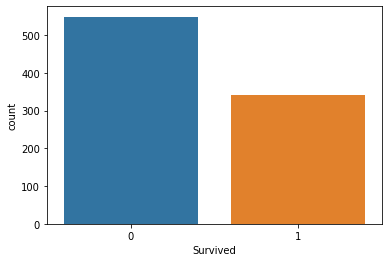

In [7]:
sns.countplot(x='Survived',data=titanic)

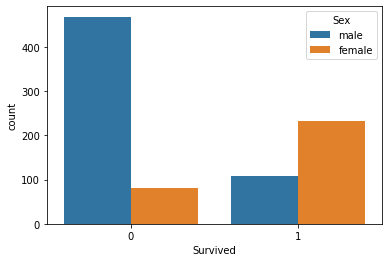

In [8]:
sns.countplot(x='Survived',hue='Sex',data=titanic)

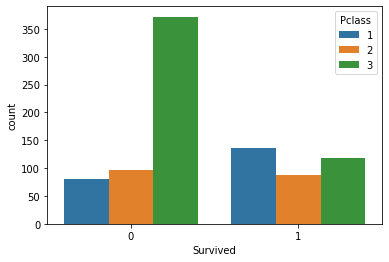

In [9]:
sns.countplot(x='Survived',hue='Pclass',data=titanic)

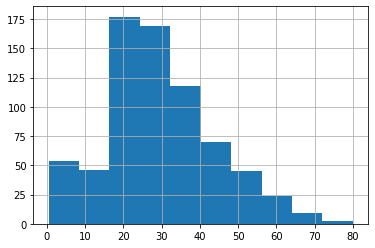

In [10]:
titanic['Age'].hist()

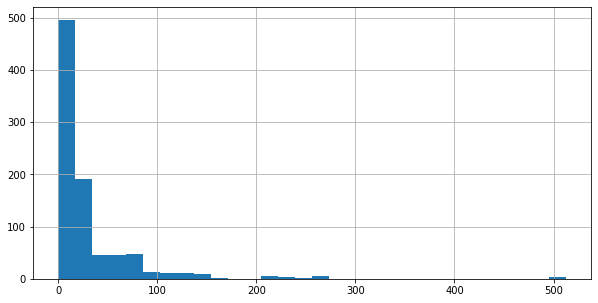

In [15]:
titanic['Fare'].hist(bins=30,figsize=(10,5))

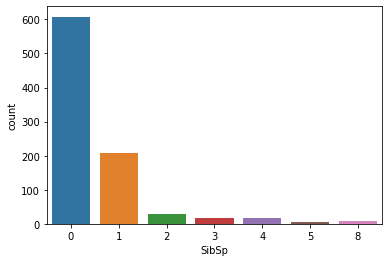

In [16]:
sns.countplot(x='SibSp',data=titanic)

# Data Wrangling

In [21]:
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

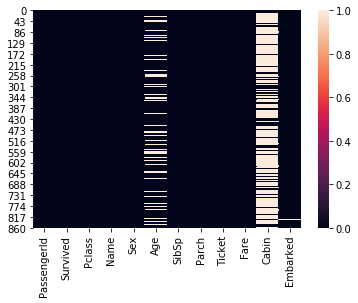

In [24]:
sns.heatmap(data=titanic.isnull())

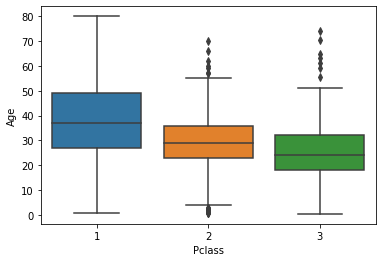

In [25]:
sns.boxplot(x='Pclass',y='Age',data=titanic)

In [29]:
titanic.drop('Cabin',axis=1,inplace=True)

In [30]:
titanic.dropna(inplace=True)

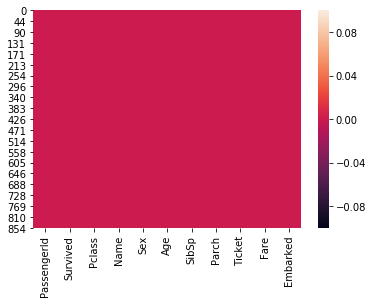

In [32]:
sns.heatmap(data=titanic.isnull())

In [33]:
titanic.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [36]:
len(titanic)

712

In [41]:
sex=pd.get_dummies(titanic['Sex'],drop_first=True)

In [43]:
sex.head()

,male
0,1
1,0
2,0
3,0
4,1


In [44]:
embark=pd.get_dummies(titanic['Embarked'],drop_first=True)

In [45]:
embark.head()

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


In [48]:
pclass=pd.get_dummies(titanic['Pclass'],drop_first=True)

In [49]:
pclass.head()

,2,3
0,0,1
1,0,0
2,0,1
3,0,0
4,0,1


In [50]:
titanic=pd.concat([titanic,sex,embark,pclass],axis=1)

In [51]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male,Q,S,2,3
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1,0,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,0,0,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0,0,1,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,0,0,1,0,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1,0,1,0,1


In [52]:
titanic.drop(['PassengerId','Name','Sex','Ticket','Embarked'],axis=1,inplace=True)

In [53]:
titanic.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S,2,3
0,0,3,22.0,1,0,7.2500,1,0,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1,0,1
3,1,1,35.0,1,0,53.1000,0,0,1,0,0
4,0,3,35.0,0,0,8.0500,1,0,1,0,1


In [56]:
titanic.drop('Pclass',axis=1,inplace=True)

In [57]:
titanic.head()

,Survived,Age,SibSp,Parch,Fare,male,Q,S,2,3
0,0,22.0,1,0,7.2500,1,0,1,0,1
1,1,38.0,1,0,71.2833,0,0,0,0,0
2,1,26.0,0,0,7.9250,0,0,1,0,1
3,1,35.0,1,0,53.1000,0,0,1,0,0
4,0,35.0,0,0,8.0500,1,0,1,0,1


# Train Data

In [62]:
X=titanic.drop('Survived',axis=1)

In [63]:
Y=titanic['Survived']

In [65]:
from sklearn.model_selection import train_test_split

In [66]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=1)

In [67]:
from sklearn.linear_model import LogisticRegression

In [68]:
LG=LogisticRegression()

In [69]:
LG.fit(X_train,Y_train)

C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [70]:
predictions=LG.predict(X_test)

In [76]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [77]:
classification_report(Y_test,predictions)

'              precision    recall  f1-score   support\n\n           0       0.81      0.83      0.82       126\n           1       0.75      0.72      0.73        88\n\n    accuracy                           0.79       214\n   macro avg       0.78      0.77      0.78       214\nweighted avg       0.78      0.79      0.78       214\n'

In [78]:
confusion_matrix(Y_test,predictions)

array([[105,  21],
       [ 25,  63]], dtype=int64)

In [79]:
accuracy_score(Y_test,predictions)

0.7850467289719626

# Explore titanic dataset and explore about the people, both those who survived and who did not survive. What factors made it more likely to survive the sinking of the titanic?

In [ ]:
Results=Accuracy Score of 